# Ejercicios de splines
**Integrantes:** Dayana Gonzalez, Maria Fernanda Rodriguez.

**1** El conjunto de datos wage contiene una serie de otras características que no se han explorado, como el estado civil (maritl), la clase de trabajo (jobclass) y otras. Explore las relaciones entre algunos de estos otros predictores y el salario, y utilice técnicas de ajuste no lineal para ajustar modelos flexibles a los datos. Cree gráficos de los resultados obtenidos y escriba un resumen de sus hallazgos.


In [2]:
# Standard imports
import warnings

# Math and data processing
import numpy as np
import scipy as sp
import pandas as pd

# StatsModels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from patsy import dmatrix

# scikit-learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error

# Visualization
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
# wage dataset 
wage = pd.read_csv("wage 1.csv")
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [18]:
df = pd.get_dummies(wage, drop_first=True)
df

,year,age,logwage,wage,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
0,2006,18,4.318063,75.043154,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2004,24,4.255273,70.476020,0,0,0,0,0,0,0,0,0,1,0,1,1,1
2,2003,45,4.875061,130.982177,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2003,43,5.041393,154.685293,1,0,0,0,0,1,0,0,0,1,0,1,1,0
4,2005,50,4.318063,75.043154,0,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,5.041393,154.685293,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2996,2007,30,4.602060,99.689464,1,0,0,0,0,0,0,1,0,0,0,0,1,1
2997,2005,27,4.193125,66.229408,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2998,2005,27,4.477121,87.981033,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [19]:
# Create dummies for predictor intervals
wage_step_dummies = pd.get_dummies(df.iloc[:,4:18], drop_first=True)  # The first interval is the base and dropped
wage_step_dummies = pd.DataFrame(
    sm.add_constant(wage_step_dummies.values),
    columns=['(Intercept)'] + list(wage_step_dummies.columns.values),
    index=wage_step_dummies.index)
wage_step_dummies.head(10)

,(Intercept),maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_2. Black,race_3. Asian,race_4. Other,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,jobclass_2. Information,health_2. >=Very Good,health_ins_2. No
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
reg_step = sm.GLM(df.wage, wage_step_dummies).fit()
print(reg_step.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2985
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                          1169.7
Method:                          IRLS   Log-Likelihood:                -14846.
Date:                Thu, 09 Sep 2021   Deviance:                   3.4914e+06
Time:                        19:40:57   Pearson chi2:                 3.49e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

In [21]:
y_pred = reg_step.predict(wage_step_dummies)
r2_score(df.wage, y_pred)

0.3314085292278639

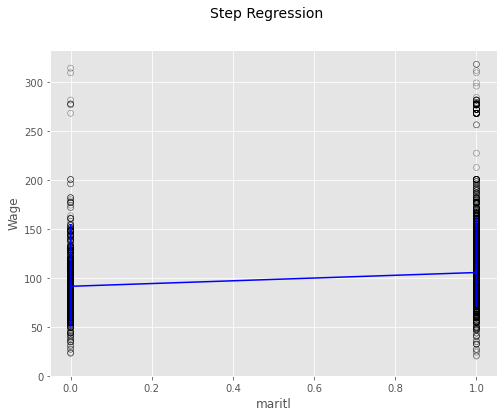

In [22]:
# indexes to sort the age values
ind_order = df.iloc[:,4].sort_values().index.values

# Plot
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Step Regression', fontsize=14)

# Scatter plot with step regression line
plt.scatter(df.iloc[:,4], df.wage, facecolor='None', edgecolor='k', alpha=0.5)
plt.plot(df.iloc[:,4][ind_order], y_pred[ind_order], color = 'b')
ax.set_ylim(ymin=0)
plt.xlabel('maritl')
plt.ylabel('Wage')
plt.show()

**Conclusiones:** 
* Según la tabla que se obtenía a partir de una variable categórica que es el maritl, la cual fue pasada a dummie, nos podemos dar cuenta que la clasificación de personas casadas, separadas y divorciadas con mucho más relevantes en las predicciones, debido a que su valor p es demasiado pequeño y su coeficiente es lo suficientemente grande.
* Observando la clasificación según la raza nos damos cuenta de que esta variable no tiene tanta importancia al realizar la predicción sobre el salario.
* En cuanto a la educación, todos los niveles de educación son relevantes para obtener la predicción ya que tienen un valor p de casi 0 y coeficientes altos.
* Observamos que un mayor nivel educativo se asocia con un mayor coeficiente dando así mas importancia en la predicción.
* El Jobclass tiene relevancia en la clasificación debido a su valor p tan bajo.
* Las personas con mala salud se asocian con un decrecimiento del salario de 18. 
* La salud buena y mala contribuyen en la predicción del salario gracias a su valor p tan bajo.
* El modelo generado mediante funciones escalonadas tuvo una precisión de 33.14%.

**2** Explore de nuevo los splines (no suavizados) para regresiones con múltiples variables. Use al menos dos predictores, siendo al menos uno categórico (diferente a jobclass) y observe como varia el RMSE.

In [23]:
wage_train, wage_test = train_test_split(df, test_size=0.25, random_state=123)

In [24]:
deg=4 # Grados de libertad

#Definicion de la transformacion
transformacion = dmatrix(
    f"te(cr(wage_train.year, df={deg}),cr(race,df={deg}))", # se definen los splines
                           { "wage_train.year": wage_train.year,
                            "race":wage_train['race_2. Black']} # Se definen los datos
)

model_spline = sm.GLM(wage_train.wage, transformacion).fit() # Train

# Prediccion
prediccion = model_spline.predict(
    dmatrix(f"te(cr(wage_test.year, df={deg}), cr(race,df={deg}) )", # Splines
            {"wage_test.year": wage_test.year,
             "race":wage_test['race_2. Black']}, # datos
            return_type='dataframe') )

print("El RMSE es:",np.sqrt(mean_squared_error(wage_test.wage, prediccion)) )

El RMSE es: 42.68829976127553


In [25]:
deg=4 # Grados de libertad

#Definicion de la transformacion
transformacion = dmatrix(
    f"te(cr(wage_train.year, df={deg}),cr(race,df={deg}),cr(race,df={deg}))", # se definen los splines
                           { "wage_train.year": wage_train.year,
                            "race":wage_train['race_2. Black'],
                            "race":wage_train['race_3. Asian']} # Se definen los datos
)

model_spline = sm.GLM(wage_train.wage, transformacion).fit() # Train

# Prediccion
prediccion = model_spline.predict(
    dmatrix(f"te(cr(wage_test.year, df={deg}), cr(race,df={deg}),cr(race,df={deg}) )", # Splines
            {"wage_test.year": wage_test.year,
             "race":wage_test['race_2. Black'],
                            "race":wage_test['race_3. Asian']}, # datos
            return_type='dataframe') )

print("El RMSE es:",np.sqrt(mean_squared_error(wage_test.wage, prediccion)) )

El RMSE es: 42.62732243326238


In [46]:
deg=4 # Grados de libertad

#Definicion de la transformacion
transformacion = dmatrix(
    f"te(cr(wage_train.year, df={deg}),cr(race,df={deg}),cr(race,df={deg}),cr(race,df={deg}))", # se definen los splines
                           { "wage_train.year": wage_train.year,
                            "race":wage_train['race_2. Black'],
                            "race":wage_train['race_3. Asian'],
                            "race":wage_train['race_4. Other']} # Se definen los datos
)

model_spline = sm.GLM(wage_train.wage, transformacion).fit() # Train

# Prediccion
prediccion = model_spline.predict(
    dmatrix(f"te(cr(wage_test.year, df={deg}), cr(race,df={deg}),cr(race,df={deg}),cr(race,df={deg}))", # Splines
            {"wage_test.year": wage_test.year,
             "race":wage_test['race_2. Black'],
             "race":wage_test['race_3. Asian'],
             "race":wage_test['race_4. Other']}, # datos
            return_type='dataframe') )

print("El RMSE es:",np.sqrt(mean_squared_error(wage_test.wage, prediccion)) )

El RMSE es: 42.57416235626157


**Resumen de los resultados:** Utilizando las variables de año y raza (categórica), observamos la variación del RMSE en un spline no suavizado. 
* Tomando el primer spline con la categoría  de raza negra y años podemos notar que tenemos un RMSE de 42.688.
* En el segundo spline utilizamos las categorías raza negra, asiática y años obtuvimos un RMSE de 42.627.
* Finalmente, tomamos todas las razas y el año obteniendo un RMSE de 42.574.

Con esto concluimos que a mayor numero de clasificaciones de raza disminuye el RMSE, aunque no de manera significativa. Esto lo podemos asociar con los anteriores resultados, en donde vimos que la raza no era tan relevante para la predicción del salario.